<a href="https://colab.research.google.com/github/kutaydemiralay/MNIST-Digit-Classification-using-PCA-and-Classifiers/blob/main/HW3_AMATH582_KutayDemiralay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# the following command loads up your google drive. It will promp you to give Colab access to your Gdrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import struct
import matplotlib.pyplot as plt

with open('/content/drive/MyDrive/train-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    print(data.shape)
    Xtraindata = np.transpose(data.reshape((size, nrows*ncols)))

with open('/content/drive/MyDrive/train-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    ytrainlabels = data.reshape((size,)) # (Optional)

with open('/content/drive/MyDrive/t10k-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    Xtestdata = np.transpose(data.reshape((size, nrows*ncols)))

with open('/content/drive/MyDrive/t10k-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    ytestlabels = data.reshape((size,)) # (Optional)


traindata_imgs =  np.transpose(Xtraindata).reshape((60000,28,28))
print(Xtraindata.shape)
print(ytrainlabels.shape)
print(Xtestdata.shape)
print(ytestlabels.shape)

(47040000,)
(784, 60000)
(60000,)
(784, 10000)
(10000,)


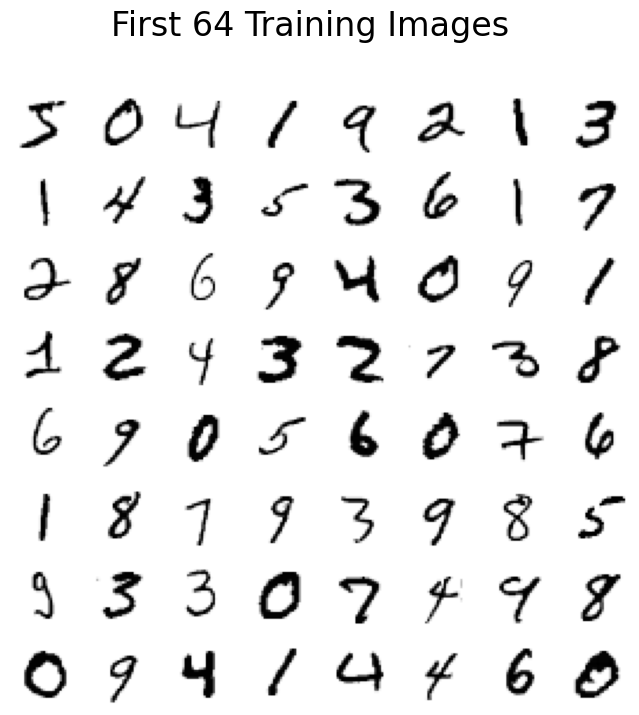

In [ ]:
def plot_digits(XX, N, title):
    fig, ax = plt.subplots(N, N, figsize=(8, 8))

    for i in range(N):
      for j in range(N):
        ax[i,j].imshow(XX[:,(N)*i+j].reshape((28, 28)), cmap="Greys")
        ax[i,j].axis("off")
    fig.suptitle(title, fontsize=24)

plot_digits(Xtraindata, 8, "First 64 Training Images" )


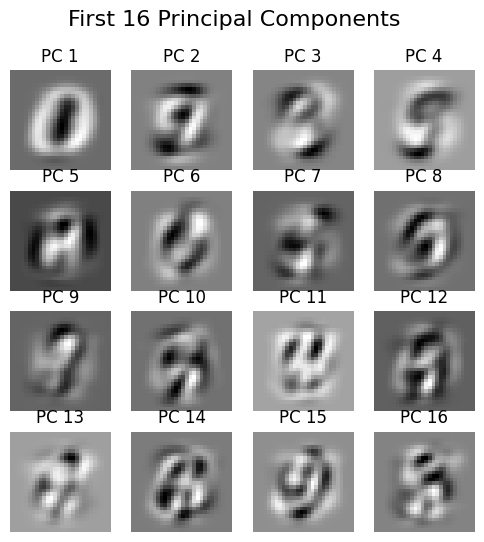

In [ ]:
from sklearn.decomposition import PCA

# Reshape each image into a vector and stack into matrix Xtrain
Xtrain = traindata_imgs.reshape((traindata_imgs.shape[0], -1))

# Perform PCA analysis
pca = PCA(n_components=16)  # You can adjust the number of components as needed
pca.fit(Xtrain)

# Plot the first 16 principal components as 28x28 images
fig, ax = plt.subplots(4, 4, figsize=(6, 6))
for i in range(4):
    for j in range(4):
        pc_image = pca.components_[4*i + j].reshape((28, 28))
        ax[i, j].imshow(pc_image, cmap="gray")
        ax[i, j].axis("off")
        ax[i, j].set_title(f"PC {4*i + j + 1}")

plt.suptitle("First 16 Principal Components", fontsize=16)
plt.show()

Number of components needed for 85.0% energy: 59


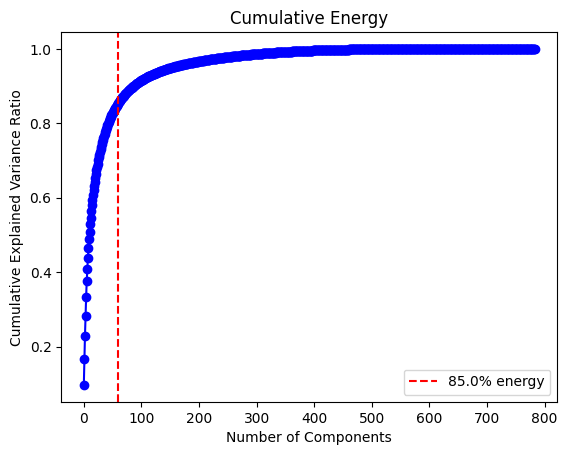

In [ ]:
from sklearn.decomposition import PCA

# Reshape each image into a vector and stack into matrix Xtrain
Xtrain = traindata_imgs.reshape((traindata_imgs.shape[0], -1)).astype(float)

# Perform PCA analysis
pca = PCA()
pca.fit(Xtrain)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed for 85% of the energy
desired_energy = 0.85
num_components_85_percent = np.argmax(cumulative_variance_ratio >= desired_energy) + 1

print(f"Number of components needed for {desired_energy*100}% energy: {num_components_85_percent}")

# Plot the cumulative explained variance ratio
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Energy')
plt.axvline(x=num_components_85_percent, color='r', linestyle='--', label=f'{desired_energy*100}% energy')
plt.legend()
plt.show()

In [ ]:
print(traindata_imgs.shape[0])
print(Xtraindata.shape)
print(Xtestdata.shape)
print(cumulative_variance_ratio.shape)

60000
(784, 60000)
(784, 10000)
(784,)


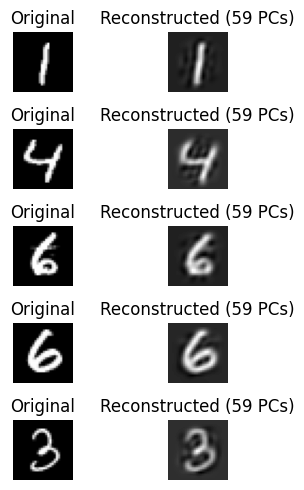

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Reshape each image into a vector and stack into matrix Xtrain
Xtrain = traindata_imgs.reshape((traindata_imgs.shape[0], -1)).astype(float)

# Perform PCA analysis
pca = PCA(n_components=59)  # Set the number of components to 59
Xtrain_pca = pca.fit_transform(Xtrain)

# Function to reconstruct images from PCA components
def reconstruct_images(components, scores):
    return np.dot(scores, components)


# Choose a few samples for visualization
num_samples = 5
sample_indices = np.random.choice(Xtrain.shape[0], num_samples, replace=False)

# Visualize approximated digit images
fig, axes = plt.subplots(num_samples, 2, figsize=(4, 1*num_samples))

for idx, sample_idx in enumerate(sample_indices):
    original_image = Xtrain[sample_idx].reshape(28, 28)

    # Reconstruct the image using the truncated number of principal components
    reconstructed_image = pca.inverse_transform(pca.transform(Xtrain[sample_idx].reshape(1, -1))[:, :num_components_85_percent])
    reconstructed_image = reconstructed_image.reshape(28, 28)

    # Plot original and reconstructed images side by side
    axes[idx, 0].imshow(original_image, cmap='gray')
    axes[idx, 0].axis('off')
    axes[idx, 0].set_title('Original')

    axes[idx, 1].imshow(reconstructed_image, cmap='gray')
    axes[idx, 1].axis('off')
    axes[idx, 1].set_title(f'Reconstructed ({num_components_85_percent} PCs)')

plt.tight_layout()
plt.show()

In [ ]:
def select_digit_subset(digit, Xtrain, ytrain, Xtest, ytest):
    # Select indices where the label matches the specified digit
    train_indices = np.where(ytrain == digit)[0]
    test_indices = np.where(ytest == digit)[0]

    # Create subset matrices based on selected indices
    Xsubset_train = Xtrain[:, train_indices]
    ysubset_train = ytrain[train_indices]

    Xsubset_test = Xtest[:, test_indices]
    ysubset_test = ytest[test_indices]

    return Xsubset_train, ysubset_train, Xsubset_test, ysubset_test

In [ ]:
Xsubset_train_1, ysubset_train_1, Xsubset_test_1, ysubset_test_1 = select_digit_subset(1, Xtraindata, ytrainlabels, Xtestdata, ytestlabels)
Xsubset_train_8, ysubset_train_8, Xsubset_test_8, ysubset_test_8 = select_digit_subset(8, Xtraindata, ytrainlabels, Xtestdata, ytestlabels)

# Combine PCA-transformed data and labels for digit 8
X_combined_train81 = np.hstack((Xsubset_train_8, Xsubset_train_1))
y_combined_train81 = np.hstack((ysubset_train_8, ysubset_train_1))

from sklearn.decomposition import PCA
n_components=59
# Assuming X_combined_train is your data
# Fit the PCA
pca = PCA(n_components=59)  # You can adjust the number of components as needed
pca.fit(X_combined_train81.T)

# Get the truncated approximated data
X_combined_train_approx81 = pca.transform(X_combined_train81.T)

# X_combined_train_approx now contains the data reconstructed using the selected number of components (n_components)

X_combined_train_approx_transposed81 = X_combined_train_approx81.T


# Ridge Classifier applied to classify the combined digits
from sklearn.linear_model import RidgeClassifierCV
RidgeCL = RidgeClassifierCV()
RidgeCL.fit(X_combined_train_approx81, y_combined_train81)

# estimate accuracy for Training

print("Training Score for digits 1,8: {}".format(RidgeCL.score(X_combined_train_approx81, y_combined_train81)))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCL, X_combined_train_approx81, y_combined_train81, cv=9)
scores

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

Training Score for digits 1,8: 0.9647423171603272
0.9644249861011834 accuracy with a standard deviation of 0.003994869477158093


In [ ]:
#Testing the Ridge Claifier applied to data set projected onto k-PCmodes, containing 8 and 1 digits

Xsubset_train_1, ysubset_train_1, Xsubset_test_1, ysubset_test_1 = select_digit_subset(1, Xtraindata, ytrainlabels, Xtestdata, ytestlabels)
Xsubset_train_8, ysubset_train_8, Xsubset_test_8, ysubset_test_8 = select_digit_subset(8, Xtraindata, ytrainlabels, Xtestdata, ytestlabels)


X_combined_test81 = np.hstack((Xsubset_test_8, Xsubset_test_1))
y_combined_test81 = np.hstack((ysubset_test_8, ysubset_test_1))

from sklearn.decomposition import PCA
n_components=59

# Fit the PCA instance
pca = PCA(n_components=59)  # You can adjust the number of components as needed
pca.fit(X_combined_test81.T)

# Get the truncated approximated data
X_combined_test_approx81 = pca.transform(X_combined_test81.T)


X_combined_test_approx_transposed81 = X_combined_test_approx81.T

# Ridge Classifier applied to classify the combined digits
from sklearn.linear_model import RidgeClassifierCV
RidgeCL = RidgeClassifierCV()
RidgeCL.fit(X_combined_test_approx81, y_combined_test81)
# estimate accuracy for Testing

print("Testing Score for digits 1,8: {}".format(RidgeCL.score(X_combined_test_approx81, y_combined_test81)))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCL, X_combined_test_approx81, y_combined_test81, cv=5)
scores

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

Testing Score for digits 1,8: 0.9777145566619251
0.972501716743029 accuracy with a standard deviation of 0.01185256804740256


In [ ]:
#Training the Ridge Claifier applied to data set projected onto k-PCmodes, containing 8 and 3 digits

Xsubset_train_3, ysubset_train_3, Xsubset_test_3, ysubset_test_3 = select_digit_subset(3, Xtraindata, ytrainlabels, Xtestdata, ytestlabels)
Xsubset_train_8, ysubset_train_8, Xsubset_test_8, ysubset_test_8 = select_digit_subset(8, Xtraindata, ytrainlabels, Xtestdata, ytestlabels)


X_combined_train83 = np.hstack((Xsubset_train_8, Xsubset_train_3))
y_combined_train83 = np.hstack((ysubset_train_8, ysubset_train_3))

from sklearn.decomposition import PCA
n_components=59
#
# Fit the PCA instance
pca = PCA(n_components=59)  # You can adjust the number of components as needed
pca.fit(X_combined_train83.T)

# Get the truncated approximated data
X_combined_train_approx83 = pca.transform(X_combined_train83.T)

# X_combined_train_approx now contains the data reconstructed using the selected number of components (n_components)

X_combined_train_approx_transposed83 = X_combined_train_approx83.T

# Ridge Classifier applied to classify the combined digits
from sklearn.linear_model import RidgeClassifierCV
RidgeCL = RidgeClassifierCV()
RidgeCL.fit(X_combined_train_approx83, y_combined_train83)
# estimate accuracy for Training and Testing

print("Training Score for digits 3,8: {}".format(RidgeCL.score(X_combined_train_approx83, y_combined_train83)))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCL, X_combined_train_approx83, y_combined_train83, cv=5)
scores

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

Training Score for digits 3,8: 0.9608579535970623
0.9583547673322872 accuracy with a standard deviation of 0.005541054578711943


In [ ]:
#Testing the Ridge Claifier applied to data set projected onto k-PCmodes, containing 8 and 3 digits

Xsubset_train_3, ysubset_train_3, Xsubset_test_3, ysubset_test_3 = select_digit_subset(3, Xtraindata, ytrainlabels, Xtestdata, ytestlabels)
Xsubset_train_8, ysubset_train_8, Xsubset_test_8, ysubset_test_8 = select_digit_subset(8, Xtraindata, ytrainlabels, Xtestdata, ytestlabels)


X_combined_test83 = np.hstack((Xsubset_test_8, Xsubset_test_3))
y_combined_test83 = np.hstack((ysubset_test_8, ysubset_test_3))

from sklearn.decomposition import PCA
n_components=59

# Fit the PCA instance
pca = PCA(n_components=59)  # You can adjust the number of components as needed
pca.fit(X_combined_test83.T)

# Get the truncated approximated data
X_combined_test_approx83 = pca.transform(X_combined_test83.T)


X_combined_test_approx_transposed83 = X_combined_test_approx83.T

# Ridge Classifier applied to classify the combined digits
from sklearn.linear_model import RidgeClassifierCV
RidgeCL = RidgeClassifierCV()
RidgeCL.fit(X_combined_test_approx83, y_combined_test83)
# estimate accuracy for Testing

print("Testing Score for digits 3,8: {}".format(RidgeCL.score(X_combined_test_approx83, y_combined_test83)))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCL, X_combined_test_approx83, y_combined_test83, cv=5)
scores

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))


Testing Score for digits 3,8: 0.9637096774193549
0.957666081469608 accuracy with a standard deviation of 0.011295838672072156


In [ ]:
#Training the Ridge Claifier applied to data set projected onto k-PCmodes, containing 2 and 7 digits

Xsubset_train_2, ysubset_train_2, Xsubset_test_2, ysubset_test_2 = select_digit_subset(2, Xtraindata, ytrainlabels, Xtestdata, ytestlabels)
Xsubset_train_7, ysubset_train_7, Xsubset_test_7, ysubset_test_7 = select_digit_subset(7, Xtraindata, ytrainlabels, Xtestdata, ytestlabels)

X_combined_train72 = np.hstack((Xsubset_train_7, Xsubset_train_2))
y_combined_train72 = np.hstack((ysubset_train_7, ysubset_train_2))

from sklearn.decomposition import PCA
n_components=59

# Fit the PCA instance
pca = PCA(n_components=59)  # You can adjust the number of components as needed
pca.fit(X_combined_train72.T)

# Get the truncated approximated data
X_combined_train_approx72 = pca.transform(X_combined_train72.T)

X_combined_train_approx_transposed72 = X_combined_train_approx72.T

# Ridge Classifier applied to classify the combined digits
from sklearn.linear_model import RidgeClassifierCV
RidgeCL = RidgeClassifierCV()
RidgeCL.fit(X_combined_train_approx72, y_combined_train72)
# estimate accuracy for Training

print("Training Score for digits 2,7: {}".format(RidgeCL.score(X_combined_train_approx72, y_combined_train72)))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCL, X_combined_train_approx72, y_combined_train72, cv=5)
scores

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

Training Score for digits 2,7: 0.9809375766996645
0.9804470193688312 accuracy with a standard deviation of 0.002740852594755171


In [ ]:
#Testing the Ridge Claifier applied to data set projected onto k-PCmodes, containing 7 and 2 digits
Xsubset_train_2, ysubset_train_2, Xsubset_test_2, ysubset_test_2 = select_digit_subset(2, Xtraindata, ytrainlabels, Xtestdata, ytestlabels)
Xsubset_train_7, ysubset_train_7, Xsubset_test_7, ysubset_test_7 = select_digit_subset(7, Xtraindata, ytrainlabels, Xtestdata, ytestlabels)


X_combined_test72 = np.hstack((Xsubset_test_7, Xsubset_test_2))
y_combined_test72 = np.hstack((ysubset_test_7, ysubset_test_2))

from sklearn.decomposition import PCA
n_components=59

# Fit the PCA instance
pca = PCA(n_components=59)  # You can adjust the number of components as needed
pca.fit(X_combined_test72.T)

# Get the truncated approximated data
X_combined_test_approx72 = pca.transform(X_combined_test72.T)


X_combined_test_approx_transposed72 = X_combined_test_approx72.T

# Ridge Classifier applied to classify the combined digits
from sklearn.linear_model import RidgeClassifierCV
RidgeCL = RidgeClassifierCV()
RidgeCL.fit(X_combined_test_approx72, y_combined_test72)
# estimate accuracy for  Testing

print("Testing Score for digits 2,7: {}".format(RidgeCL.score(X_combined_test_approx72, y_combined_test72)))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCL, X_combined_test_approx72, y_combined_test72, cv=5)
scores

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

Testing Score for digits 2,7: 0.9742718446601941
0.9660194174757282 accuracy with a standard deviation of 0.012471099590937014


In [ ]:
#Training the Ridge Claifier applied to data set projected onto k-PCmodes, containing all digits

X_combined_trainall=Xtraindata
y_combined_trainall=ytrainlabels

from sklearn.decomposition import PCA
n_components=59

# Fit the PCA instance
pca = PCA(n_components=59)  # You can adjust the number of components as needed
pca.fit(X_combined_trainall.T)

# Get the truncated approximated data
X_combined_train_approxall = pca.transform(X_combined_trainall.T)


X_combined_train_approx_transposedall = X_combined_train_approxall.T

# Ridge Classifier applied to classify the combined digits
from sklearn.linear_model import RidgeClassifierCV
RidgeCL = RidgeClassifierCV()
RidgeCL.fit(X_combined_train_approxall, y_combined_trainall)
# estimate accuracy for Training

print("Training Score for all digits: {}".format(RidgeCL.score(X_combined_train_approxall, y_combined_trainall)))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCL, X_combined_train_approxall, y_combined_trainall, cv=5)
scores

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

Training Score for all digits: 0.8455
0.8440666666666667 accuracy with a standard deviation of 0.009598524192117586


In [ ]:
#Testing the Ridge Claifier applied to data set projected onto k-PCmodes, containing all digits
X_combined_testall=Xtestdata
y_combined_testall=ytestlabels


from sklearn.decomposition import PCA
n_components=59

# Fit the PCA instance
pca = PCA(n_components=59)  # You can adjust the number of components as needed
pca.fit(X_combined_testall.T)

# Get the truncated approximated data
X_combined_test_approxall = pca.transform(X_combined_testall.T)


X_combined_test_approx_transposedall = X_combined_test_approxall.T

# Ridge Classifier applied to classify the combined digits
from sklearn.linear_model import RidgeClassifierCV
RidgeCL = RidgeClassifierCV()
RidgeCL.fit(X_combined_test_approxall, y_combined_testall)
# estimate accuracy for Testing

print("Testing score for all digits: {}".format(RidgeCL.score(X_combined_test_approxall, y_combined_testall)))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCL, X_combined_test_approxall, y_combined_testall, cv=5)
scores

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

Testing score for all digits: 0.8567
0.8417999999999999 accuracy with a standard deviation of 0.030483766171521515


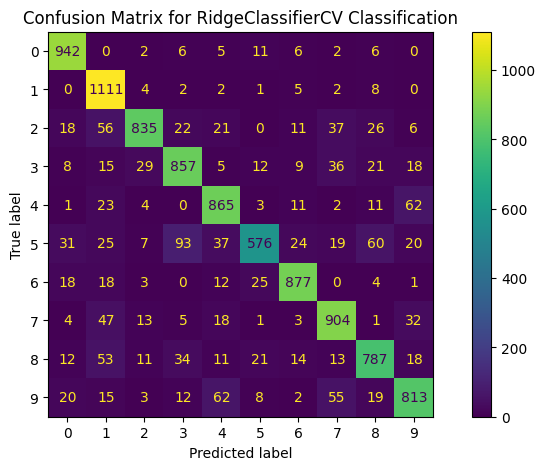

In [ ]:
# plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = RidgeCL.predict(X_combined_test_approxall)

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_combined_testall, y_pred, ax=ax)


_ = ax.set_title(
    f"Confusion Matrix for {RidgeCL.__class__.__name__} Classification")

In [ ]:
#Testing and Training the KNN Claifier applied to data set projected onto k-PCmodes, containing all digits


X_combined_trainall=Xtraindata
y_combined_trainall=ytrainlabels
X_combined_testall=Xtestdata
y_combined_testall=ytestlabels



from sklearn.decomposition import PCA
n_components=59

# Fit the PCA instance
pca = PCA(n_components=59)  # You can adjust the number of components as needed
pca.fit(X_combined_trainall.T)

# Get the truncated approximated data
X_combined_train_approxall = pca.transform(X_combined_trainall.T)


X_combined_train_approx_transposedall = X_combined_train_approxall.T



# KNN Classifier applied to classify
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_combined_train_approxall)
X_test = scaler.transform(X_combined_test_approxall)


KNNCL = KNeighborsClassifier(n_neighbors=3)
KNNCL.fit(X_train, y_combined_trainall)


# estimate accuracy for Training and Testing

print("Training Score: {}".format(KNNCL.score(X_train, y_combined_trainall)))

KNNCL.fit(X_test, y_combined_testall)
print("Testing Score: {}".format(KNNCL.score(X_test, y_combined_testall)))

Training Score: 0.98285
Testing Score: 0.9678


In [ ]:
#Cross Validation


from sklearn.model_selection import cross_val_score

X_combined_trainall=Xtraindata
y_combined_trainall=ytrainlabels
X_combined_testall=Xtestdata
y_combined_testall=ytestlabels


from sklearn.decomposition import PCA
n_components=59
# Assuming X_combined_train is your data
# Fit the PCA instance
pca = PCA(n_components=59)  # You can adjust the number of components as needed
pca.fit(X_combined_trainall.T)
pca.fit(X_combined_testall.T)

# Get the truncated approximated data
X_combined_train_approxall = pca.transform(X_combined_trainall.T)

X_combined_test_approxall = pca.transform(X_combined_testall.T)

# X_combined_train_approx now contains the data reconstructed using the selected number of components (n_components)

X_combined_train_approx_transposedall = X_combined_train_approxall.T

print(X_combined_test_approxall.shape)


(10000, 59)


In [ ]:
# KNN Classifier applied for training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_combined_train_approxall)
X_test = scaler.transform(X_combined_test_approxall)


KNNCL = KNeighborsClassifier(n_neighbors=3)
KNNCL.fit(X_train, y_combined_trainall)


#Cross Validation applied for training
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    KNNCLk = KNeighborsClassifier(n_neighbors=k)
    scorescv = cross_val_score(KNNCLk, X_train, y_combined_trainall,cv=5)
    print("{} accuracy with a standard deviation of {}".format(scorescv.mean(), scorescv.std()))
    scores.append(scorescv.mean())

# print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

0.9615 accuracy with a standard deviation of 0.0018752777572047022
0.9516333333333332 accuracy with a standard deviation of 0.0014429907214608703
0.9607333333333333 accuracy with a standard deviation of 0.0014638230008364253
0.9583833333333333 accuracy with a standard deviation of 0.0012830086169278547
0.9595666666666667 accuracy with a standard deviation of 0.0019346260046266787
0.9582666666666666 accuracy with a standard deviation of 0.0016032952178421666
0.9582833333333334 accuracy with a standard deviation of 0.001592168332809078
0.9568999999999999 accuracy with a standard deviation of 0.0015753306531222822
0.9562333333333333 accuracy with a standard deviation of 0.002018250067096097
0.9547166666666668 accuracy with a standard deviation of 0.0019225272718770895
0.9541499999999999 accuracy with a standard deviation of 0.002446880099682502
0.9529666666666665 accuracy with a standard deviation of 0.0027343494046420938
0.9525666666666666 accuracy with a standard deviation of 0.00288405

Text(0, 0.5, 'Accuracy Score')

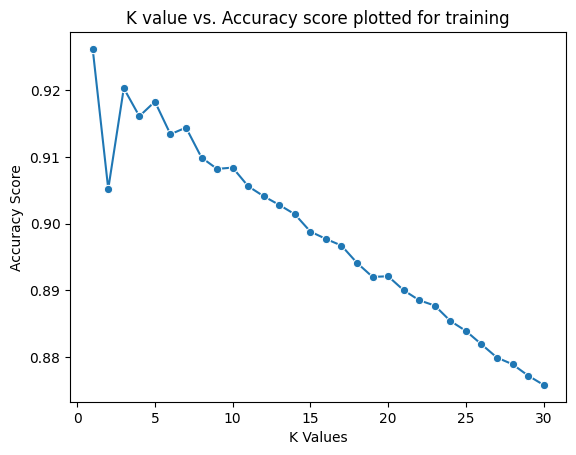

In [ ]:
#K value vs. Accuracy score plotted for training

import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.title("K value vs. Accuracy score plotted for training")
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:

KNNCL = KNeighborsClassifier(n_neighbors=3)
KNNCL.fit(X_train, y_combined_trainall)


#Cross Validation applied for training
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    KNNCLk = KNeighborsClassifier(n_neighbors=k)
    scorescv = cross_val_score(KNNCLk, X_test, y_combined_testall,cv=5)
    print("{} accuracy with a standard deviation of {}".format(scorescv.mean(), scorescv.std()))
    scores.append(scorescv.mean())

# print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

0.9262 accuracy with a standard deviation of 0.022677301426757095
0.9052 accuracy with a standard deviation of 0.02293599790722001
0.9202999999999999 accuracy with a standard deviation of 0.02168547901246361
0.9160999999999999 accuracy with a standard deviation of 0.022046314884805563
0.9183 accuracy with a standard deviation of 0.02381302164782958
0.9134 accuracy with a standard deviation of 0.02516227334721567
0.9144 accuracy with a standard deviation of 0.025527240352219847
0.9099 accuracy with a standard deviation of 0.027534342192977856
0.9082000000000001 accuracy with a standard deviation of 0.028890482862008376
0.9084 accuracy with a standard deviation of 0.029803355515780446
0.9056 accuracy with a standard deviation of 0.029653667564063638
0.9041 accuracy with a standard deviation of 0.02863110196971116
0.9028 accuracy with a standard deviation of 0.029793623478858697
0.9014 accuracy with a standard deviation of 0.030333809520071794
0.8987999999999999 accuracy with a standard d

Text(0, 0.5, 'Accuracy Score')

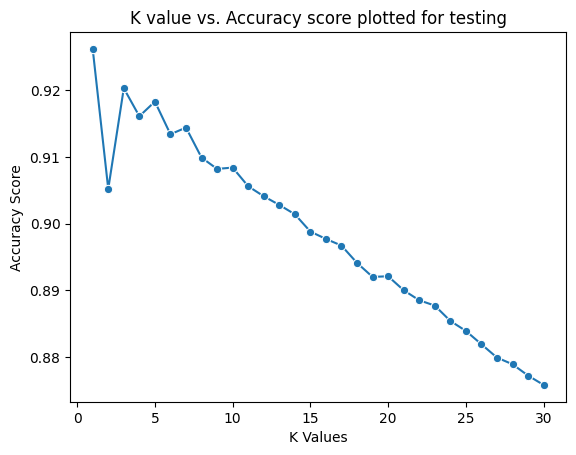

In [ ]:
#K value vs. Accuracy score plotted for training

import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.title("K value vs. Accuracy score plotted for testing")
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

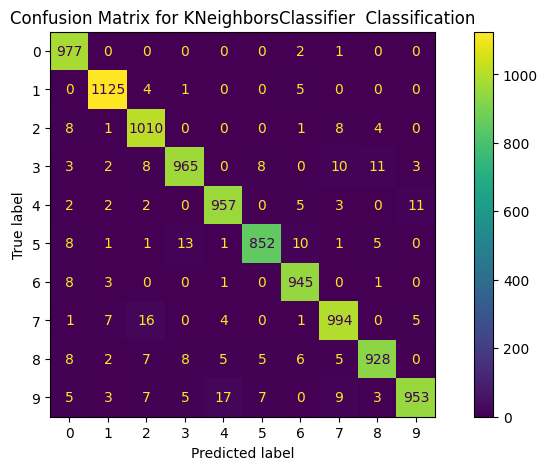

In [ ]:
# plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = KNNCL.predict(X_combined_test_approxall)

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_combined_testall, y_pred, ax=ax)

_ = ax.set_title(
    f"Confusion Matrix for {KNNCL.__class__.__name__}  Classification")

In [ ]:
# LDA Classifier applied
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDACL = LinearDiscriminantAnalysis()
LDACL.fit(X_combined_train_approxall,y_combined_trainall) #training LDA classifier


# estimate accuracy for Training and Testing

print("Training Score: {}".format(LDACL.score(X_combined_train_approxall,y_combined_trainall)))
print("Testing Score: {}".format(LDACL.score(X_combined_test_approxall,y_combined_testall)))

Training Score: 0.8668833333333333
Testing Score: 0.8749


In [ ]:
#Cross Validation score for Training

from sklearn.model_selection import cross_val_score

scores = cross_val_score(LDACL, X_combined_train_approxall, y_combined_trainall, cv=5)
scores

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

0.8653666666666666 accuracy with a standard deviation of 0.00855693351096707


In [ ]:
#Cross Validation score for Testing

from sklearn.model_selection import cross_val_score

scores = cross_val_score(LDACL, X_combined_test_approxall, y_combined_testall, cv=5)
scores

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

0.8641 accuracy with a standard deviation of 0.029443844857626862


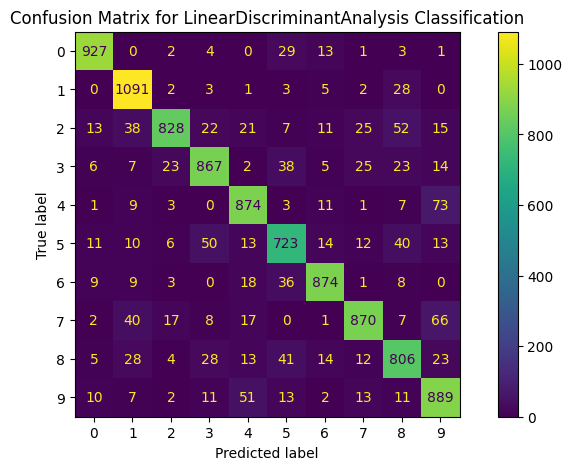

In [ ]:
# plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = LDACL.predict(X_combined_test_approxall)

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_combined_testall, y_pred, ax=ax)

_ = ax.set_title(
    f"Confusion Matrix for {LDACL.__class__.__name__} Classification")